## Employee Dataset

Conjunto de dados extraído do <a href="https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset"> Kaggle</a>

Esse conjunto de dados contém informações sobre os funcionários de uma empresa, incluindo seus antecedentes educacionais, histórico de trabalho, dados demográficos e fatores relacionados ao emprego. Ele foi anonimizado para proteger a privacidade e, ao mesmo tempo, fornecer informações valiosas sobre a força de trabalho.

Colunas:

Education (Educação): As qualificações educacionais dos funcionários, incluindo grau, instituição e área de estudo.

Joining Year (Ano de Ingresso): O ano em que cada colaborador ingressou na empresa, indicando seu tempo de serviço.

City (Cidade): O local ou cidade onde cada funcionário está baseado ou trabalha.

Payment Tier( Nível de pagamento): Categorização dos funcionários em diferentes níveis salariais.

Age (Idade): A idade de cada funcionário, fornecendo insights demográficos.

Gender (Gênero): Identidade de gênero dos colaboradores, promovendo a análise da diversidade.

Ever Benched (Já esteve em inatividade): Indica se um funcionário já esteve temporariamente sem trabalho atribuído.

Experience in Current Domain (Experiência no Domínio Atual): O número de anos de experiência que os funcionários têm em sua área atual.

Leave or Not (Permanece ou não na empresa): atributo alvo. 0 indica sairá da empresa. 1 não sairá

<h3>Análise Descritiva</h3>

Respondendo 5 perguntas de negócios 

1. Qual é a distribuição das qualificações educacionais entre os funcionários?
2. Como o tempo de serviço (Ano de Adesão) varia entre as diferentes cidades?
3. Existe uma correlação entre Nível de Pagamento e Experiência no Domínio Atual?
4. Qual é a distribuição de gênero dentro da força de trabalho?
5. Há algum padrão no comportamento de afastamento entre os funcionários?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1. Carregando o conjunto de dados e exibindo os 5 primeiros registros

In [2]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


2. Quantas linhas e colunas tem?

In [3]:
df.shape

(4653, 9)

3. Informação sobre os dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


4. Não há dados faltantes?

In [5]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

5. Breve Estatística - dados numéricos

In [8]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Como os dados estão nos tipos corretos para a análise e não há valores ausentes, não necessita ser tratado, então vamos para as perguntas

## Perguntas

1. Qual é a distribuição das qualificações educacionais entre os funcionários?

In [9]:
education_counts = df['Education'].value_counts()

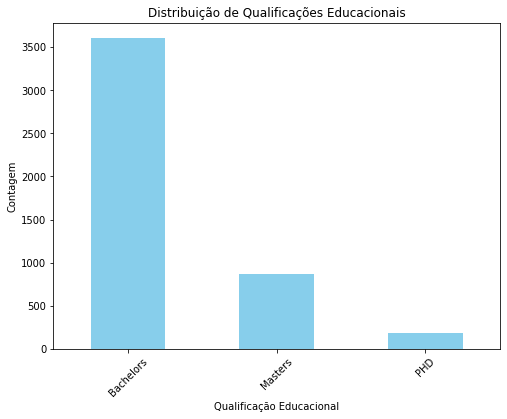

In [10]:
# Respondendo através de gráficos de barras
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Qualificações Educacionais')
plt.xlabel('Qualificação Educacional')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show();

2. Como o tempo de serviço (Ano de Adesão) varia entre as diferentes cidades?

In [13]:
# Gráfico de barras empilhadas
fig = px.bar(df, x='City', y='JoiningYear',color='JoiningYear', title='Variação do tempo de serviço por cidade', labels={'City': 'Cidade', 'JoiningYear': 'Ano de Adesão'})
fig.show();

3. Existe uma correlação entre Nível de Pagamento e Experiência no Domínio Atual?

In [19]:
correlacao = df['PaymentTier'].corr(df['ExperienceInCurrentDomain'])
print(f'Correlação: {correlacao * 100:.2f}%')

Correlação: 1.83%


Um valor de 1,83% para a correlação entre duas variáveis geralmente indica uma correlação extremamente fraca ou praticamente inexistente. Nesse contexto, isso significa que não há uma relação linear significativa entre o nível de pagamento e a experiência no domínio atual. Portanto, não há uma associação clara entre essas duas variáveis com base na análise de correlação de Pearson.

4. Qual é a distribuição de gênero dentro da força de trabalho?

<Axes: xlabel='Gender', ylabel='Count'>

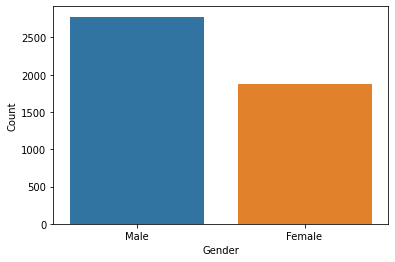

In [23]:
# Contagem de gênero
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Cria o gráfico de barras
sns.barplot(data=gender_counts, x='Gender', y='Count')

In [24]:
# Ou com gráfico de pizza
gender_counts = df['Gender'].value_counts()

# Cria o gráfico
fig = px.pie(
    gender_counts, values=gender_counts, names=gender_counts.index,
    title='Distribuição de Gênero na Força de Trabalho'
)
fig.show()

5. Há algum padrão no comportamento de afastamento entre os funcionários?

Para identificar padrões no comportamento de afastamento entre os funcionários, um gráfico de linha ou um gráfico de barras empilhadas ao longo do tempo pode ser uma escolha adequada. Esses tipos de gráficos podem ajudar a mostrar tendências ao longo do tempo e como o comportamento de afastamento pode variar

In [53]:
# Gráfico de linha
fig = px.line(
    df, x='JoiningYear', y='LeaveOrNot',
    title='Comportamento de afastamento ao longo do tempo',color='ExperienceInCurrentDomain',
    labels={'JoiningYear': 'Ano de Adesão', 'LeaveOrNot': 'Taxa de Afastamento'}
)
fig.show()

In [52]:
# Gráfico de Área Empilhada

fig = px.area(
    df, 
    x='JoiningYear', y='LeaveOrNot', color='ExperienceInCurrentDomain',
    title='Comportamento de Afastamento ao longo do tempo',
    labels={'JoiningYear': 'Ano de Adesão', 'LeaveOrNot': 'Taxa de Afastamento'}    
)
   
fig.show()